In [23]:
import sqlite3
import pandas as pd
import re

conn = sqlite3.connect('delhi_airport_departures.db')
cursor = conn.cursor()

with open('/cia-4.sql', 'r') as file:
    sql_script = file.read()
    sql_script = re.sub(r"CREATE\s+DATABASE.*?;", "", sql_script, flags=re.IGNORECASE)
    sql_script = re.sub(r"USE\s+.*?;", "", sql_script, flags=re.IGNORECASE)


    sql_script = re.sub(r"#.*$", "", sql_script, flags=re.MULTILINE)

    sql_script = re.sub(r"CREATE\s+TABLE", r"CREATE TABLE IF NOT EXISTS", sql_script, flags=re.IGNORECASE)

    statements = sql_script.split(';')


    for statement in statements:
        statement = statement.strip()
        if statement:
            try:
                cursor.execute(statement)
            except sqlite3.IntegrityError as e:

                print(f"Error executing statement: {statement}")
                print(f"Error: {e}")

            except Exception as e:
                print(f"Error executing statement: {statement}")
                print(f"Error: {e}")


conn.commit()

Error executing statement: INSERT INTO AIRCRAFT_STORAGE_COST (Aircraft_Type, Storage_Cost_INR) VALUES
('Boeing 747-400F', 350000),
('Boeing 777-200LR', 290000),
('Boeing 777-200ER', 290000),
('Boeing 777-300ER', 290000),
('Boeing 777F', 290000),
('Boeing 787-8', 250000),
('Boeing 787-9', 250000),
('Boeing 737-800', 140000),
('Boeing 737 MAX 8', 140000),
('Airbus A350-1000', 280000),
('Airbus A350-900', 280000),
('Airbus A330-300', 255000),
('Airbus A330-200', 255000),
('Airbus A320', 150000),
('Airbus A320neo', 150000),
('Airbus A340', 285000),
('Airbus A380', 375000)
Error: UNIQUE constraint failed: AIRCRAFT_STORAGE_COST.Aircraft_Type
Error executing statement: -- Create Stored Procedure for Updating Flight Details
DELIMITER //
CREATE PROCEDURE Update_Flight_Schedule(
    IN Flight_No VARCHAR(255),
    IN New_Departure_Time TIME,
    IN New_Destination VARCHAR(255)
)
BEGIN
    UPDATE PLANE_INFO_DELHI
    SET Departure_Time = New_Departure_Time, Destination = New_Destination
    WHERE 

In [24]:
table_names = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(table_names)

Tables in the database:
                               name
0                  PLANE_INFO_DELHI
1             AIRCRAFT_STORAGE_COST
2          EARLY_MORNING_DEPARTURES
3              AFTERNOON_DEPARTURES
4                EVENING_DEPARTURES
5                  NIGHT_DEPARTURES
6  IGI_International_Airport_Stores
7                    Passenger_Data
8                 Seat_Availability


In [25]:

afternoon_departures_df = pd.read_sql('SELECT * FROM afternoon_departures', conn)
evening_departures_df = pd.read_sql('SELECT * FROM evening_departures', conn)
passenger_data_df = pd.read_sql('SELECT * FROM passenger_data', conn)
seat_availability_df = pd.read_sql('SELECT * FROM seat_availability', conn)


print("Afternoon Departures Table:")
print(afternoon_departures_df.head())
print("\nEvening Departures Table:")
print(evening_departures_df.head())
print("\nPassenger Data Table:")
print(passenger_data_df.head())
print("\nSeat Availability Table:")
print(seat_availability_df.head())

Afternoon Departures Table:
          Airline Flight_Number Departure_Time                    Destination  \
0      Air France         AF789       11:45:00  Paris Charles de Gaulle (CDG)   
1  Japan Airlines         JL123       12:30:00             Tokyo Haneda (HND)   
2      Korean Air         KE456       13:15:00            Seoul Incheon (ICN)   
3    Thai Airways         TG234       14:00:00     Bangkok Suvarnabhumi (BKK)   
4          Qantas         QF345       15:30:00           Sydney Airport (SYD)   

      Aircraft_Type  
0  Boeing 777-300ER  
1      Boeing 787-8  
2   Airbus A330-200  
3  Boeing 777-300ER  
4      Boeing 787-9  

Evening Departures Table:
                         Airline Flight_Number Departure_Time  \
0       KLM Royal Dutch Airlines         KL456       17:45:00   
1  Swiss International Air Lines         LX789       18:30:00   
2                        Finnair         AY123       19:15:00   
3          Scandinavian Airlines         SK456       20:00:00   
4

In [38]:
airport_stores_df = pd.read_sql('SELECT * FROM igi_international_airport_stores', conn)
early_morning_departures_df = pd.read_sql('SELECT * FROM early_morning_departures', conn)
afternoon_departures_df = pd.read_sql('SELECT * FROM afternoon_departures', conn)
evening_departures_df = pd.read_sql('SELECT * FROM evening_departures', conn)
night_departures_df = pd.read_sql('SELECT * FROM night_departures', conn)

# Preview the data
print("Airport Stores Data:")
print(airport_stores_df.head())
print("\nEarly Morning Departures Data:")
print(early_morning_departures_df.head())

Airport Stores Data:
  store_id         store_name       store_type          location  \
0     None          Pizza Hut       Restaurant        Food Court   
1     None          Starbucks       Restaurant        Food Court   
2     None        Burger King       Restaurant  Departure Gate 7   
3     None         McDonald’s       Restaurant       Lounge Area   
4     None  Vending Machine 1  Vending Machine           Gate 14   

                                         description  
0  Serves a variety of pizzas, pasta, and fast food.  
1  Popular coffee shop offering a wide selection ...  
2  International fast-food chain specializing in ...  
3  International fast-food chain serving burgers,...  
4  Dispenses snacks, bottled water, and soft drinks.  

Early Morning Departures Data:
           Airline Flight_Number Departure_Time  \
0        Air India         AI123       06:30:00   
1         Emirates         EK542       07:15:00   
2        Lufthansa         LH741       08:00:00   
3  B

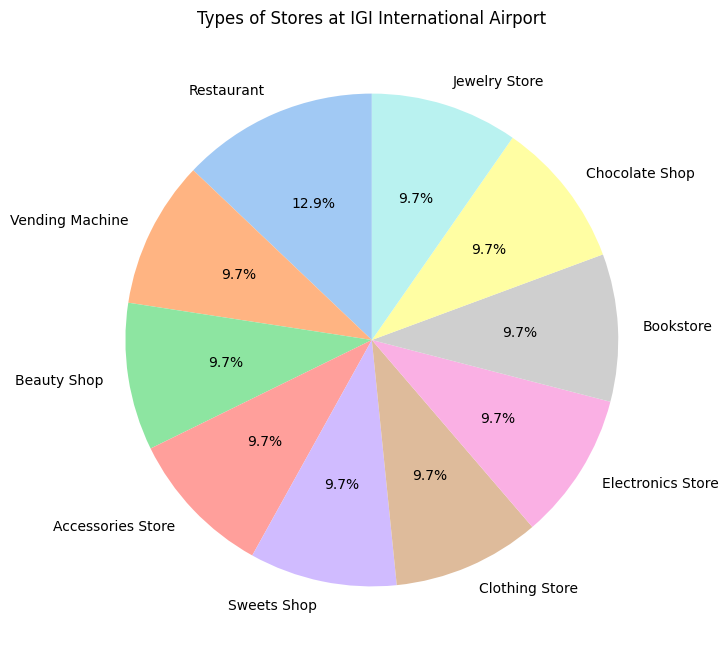

In [39]:
store_types = airport_stores_df['store_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(store_types, labels=store_types.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Types of Stores at IGI International Airport')
plt.show()

<ipython-input-40-0ca177d855ea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time of Day', y='Departures', data=departures_df, palette='Blues_d')


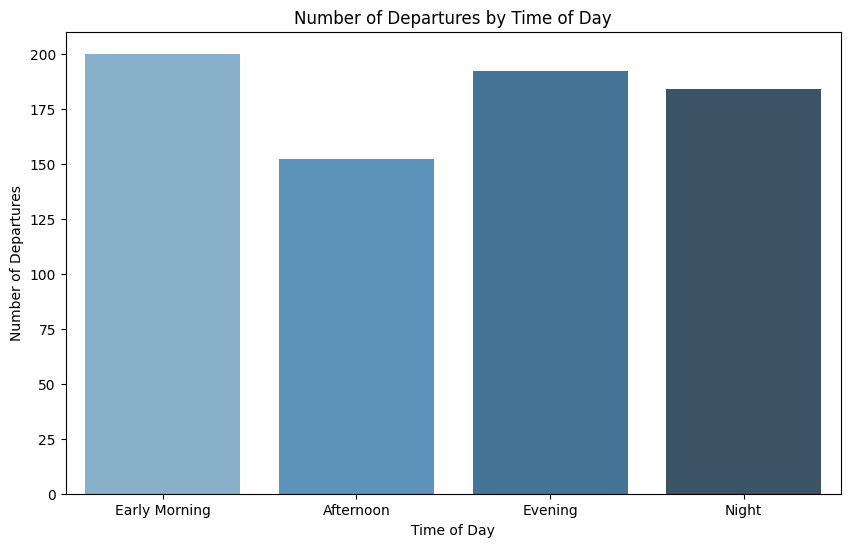

In [40]:
departures_data = {
    'Time of Day': ['Early Morning', 'Afternoon', 'Evening', 'Night'],
    'Departures': [
        len(early_morning_departures_df),
        len(afternoon_departures_df),
        len(evening_departures_df),
        len(night_departures_df)
    ]
}

departures_df = pd.DataFrame(departures_data)


plt.figure(figsize=(10, 6))
sns.barplot(x='Time of Day', y='Departures', data=departures_df, palette='Blues_d')
plt.title('Number of Departures by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Departures')
plt.show()

<ipython-input-42-053cc543fc4b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Visited_Store', y='Spent_Amount_USD', data=store_spent_df, palette='viridis')


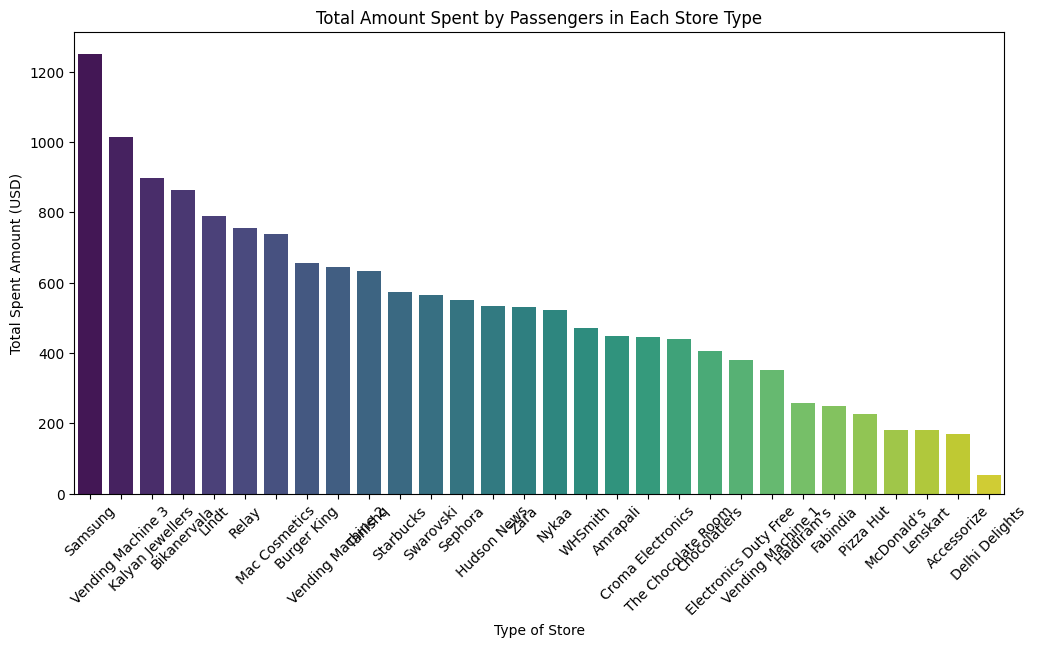

In [42]:

passenger_data_df = pd.read_sql('SELECT * FROM Passenger_Data', conn)


if 'Spent_Amount_USD' in passenger_data_df.columns and 'Visited_Store' in passenger_data_df.columns:

    store_spent_df = passenger_data_df.groupby('Visited_Store')['Spent_Amount_USD'].sum().reset_index()


    store_spent_df = store_spent_df.sort_values(by='Spent_Amount_USD', ascending=False)


    plt.figure(figsize=(12, 6))
    sns.barplot(x='Visited_Store', y='Spent_Amount_USD', data=store_spent_df, palette='viridis')
    plt.title('Total Amount Spent by Passengers in Each Store Type')
    plt.xlabel('Type of Store')
    plt.ylabel('Total Spent Amount (USD)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: Columns 'Spent_Amount_USD' and/or 'Visited_Store' not found in 'Passenger_Data' table.")


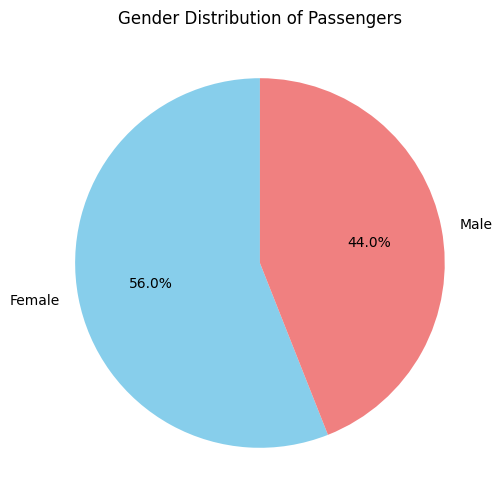

In [43]:
passenger_data_df = pd.read_sql('SELECT * FROM Passenger_Data', conn)

if 'Passenger_Gender' in passenger_data_df.columns and 'Concession_Type' in passenger_data_df.columns:

    gender_counts = passenger_data_df['Passenger_Gender'].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title('Gender Distribution of Passengers')
    plt.show()

<ipython-input-49-058d9ce11222>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Concession_Type', y='Count', data=concession_counts, palette='coolwarm')


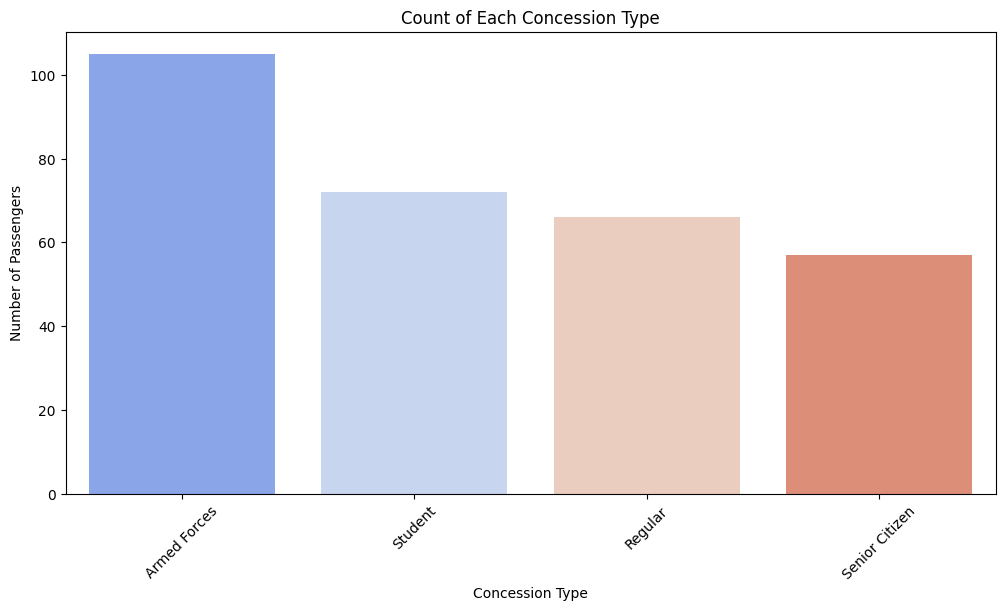

In [49]:
passenger_data_df = pd.read_sql('SELECT * FROM Passenger_Data', conn)

if 'Passenger_Gender' in passenger_data_df.columns and 'Concession_Type' in passenger_data_df.columns:

    concession_counts = passenger_data_df['Concession_Type'].value_counts().reset_index()
    concession_counts.columns = ['Concession_Type', 'Count']

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Concession_Type', y='Count', data=concession_counts, palette='coolwarm')
    plt.title('Count of Each Concession Type')
    plt.xlabel('Concession Type')
    plt.ylabel('Number of Passengers')
    plt.xticks(rotation=45)
    plt.show()

else:
    print("Error: Required columns 'Passenger_Gender' and/or 'Concession_Type' not found in 'Passenger_Data' table.")

<ipython-input-50-10e186589d7d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seat_Class', y='Count', data=seat_class_counts, palette='viridis')


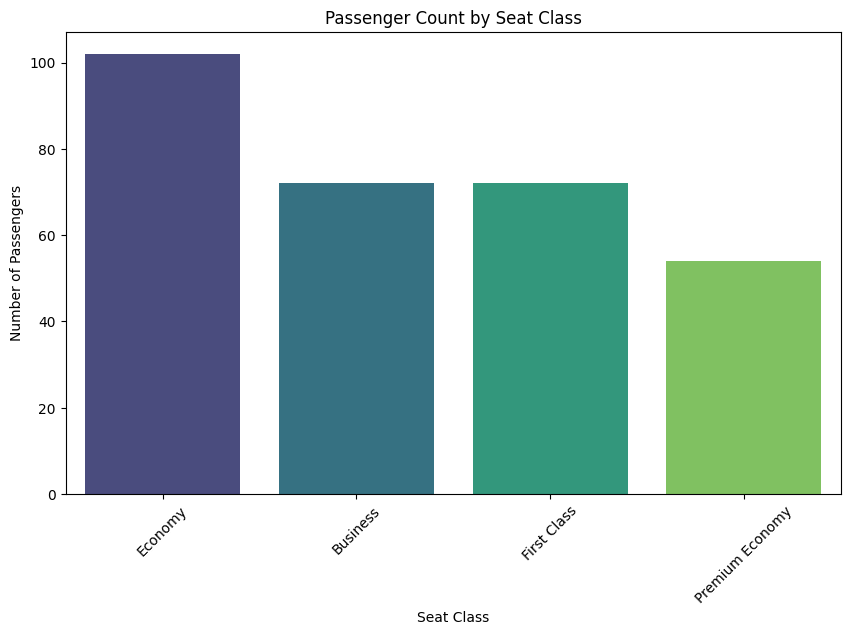

In [50]:
if 'Seat_Class' in passenger_data_df.columns:

    seat_class_counts = passenger_data_df['Seat_Class'].value_counts().reset_index()
    seat_class_counts.columns = ['Seat_Class', 'Count']


    plt.figure(figsize=(10, 6))
    sns.barplot(x='Seat_Class', y='Count', data=seat_class_counts, palette='viridis')
    plt.title('Passenger Count by Seat Class')
    plt.xlabel('Seat Class')
    plt.ylabel('Number of Passengers')
    plt.xticks(rotation=45)
    plt.show()

else:
    print("Error: Required column 'Seat_Class' not found in 'Passenger_Data' table.")

In [64]:
PLANE_INFO_DELHI_df = pd.read_sql('SELECT * FROM PLANE_INFO_DELHI', conn)


AIRCRAFT_STORAGE_COST_df = pd.read_sql('SELECT * FROM AIRCRAFT_STORAGE_COST', conn)


In [63]:
# Import Plotly
import plotly.express as px

# Check if 'Aircraft_Type' column exists in the DataFrame
if 'Aircraft_Type' in PLANE_INFO_DELHI_df.columns:
    # Count the number of each Aircraft_Type
    aircraft_type_counts = PLANE_INFO_DELHI_df['Aircraft_Type'].value_counts().reset_index()
    aircraft_type_counts.columns = ['Aircraft_Type', 'Count']

    # Create an interactive bar chart using Plotly
    fig = px.bar(
        aircraft_type_counts,
        x='Aircraft_Type',
        y='Count',
        title='Count of Each Aircraft Type in Delhi Airport',
        labels={'Aircraft_Type': 'Aircraft Type', 'Count': 'Number of Planes'},
        color='Aircraft_Type'
    )

    # Customize the chart
    fig.update_layout(
        xaxis_title='Aircraft Type',
        yaxis_title='Number of Planes',
        template='plotly_dark'
    )

    # Show the interactive plot
    fig.show()

else:
    print("Error: Column 'Aircraft_Type' not found in the DataFrame.")

In [65]:
aircraft_storage_cost_df = pd.read_sql('SELECT * FROM AIRCRAFT_STORAGE_COST', conn)
plane_info_df = pd.read_sql('SELECT * FROM PLANE_INFO_DELHI', conn)
aircraft_count = plane_info_df['Aircraft_Type'].value_counts().reset_index()
aircraft_count.columns = ['Aircraft_Type', 'Count']
merged_data = pd.merge(aircraft_count, aircraft_storage_cost_df, on='Aircraft_Type', how='left')
merged_data['Total_Storage_Cost_INR'] = merged_data['Count'] * merged_data['Storage_Cost_INR']

import plotly.express as px

fig = px.bar(
    merged_data,
    x='Aircraft_Type',
    y='Total_Storage_Cost_INR',
    title='Total Storage Cost per Aircraft Type',
    labels={'Aircraft_Type': 'Aircraft Type', 'Total_Storage_Cost_INR': 'Total Storage Cost (INR)'},
    color='Aircraft_Type'
)
fig.update_layout(
    xaxis_title='Aircraft Type',
    yaxis_title='Total Storage Cost (INR)',
    template='plotly_dark'
)

fig.show()
